Aharon Rabson <br>
### Childcare Prices Analysis

In [2]:
import pandas as pd

In [9]:
# Load the dataset to inspect and analyze
childcare_data = pd.ExcelFile('nationaldatabaseofchildcareprices.xlsx')

# Display sheet names to understand the structure of the file
childcare_data.sheet_names

['nationaldatabaseofchildcare']

In [10]:
# Load the primary (only) sheet
data = childcare_data.parse('nationaldatabaseofchildcare')

# Display the first few rows to understand its structure and content
data.head()

,State_Name,State_Abbreviation,County_Name,County_FIPS_Code,StudyYear,UNR_16,FUNR_16,MUNR_16,UNR_20to64,FUNR_20to64,...,MFCCToddler,MFCCToddler_flag,MFCCPreschool,MFCCPreschool_flag,_75FCCInfant,_75FCCInfant_flag,_75FCCToddler,_75FCCToddler_flag,_75FCCPreschool,_75FCCPreschool_flag
0,Alabama,AL,Autauga County,1001,2008,5.42,4.41,6.32,4.6,3.5,...,83.45,3.0,81.40,1.0,97.4,1.0,97.4,3.0,95.0,1.0
1,Alabama,AL,Autauga County,1001,2009,5.93,5.72,6.11,4.8,4.6,...,87.39,3.0,85.68,1.0,102.0,1.0,102.0,3.0,100.0,1.0
2,Alabama,AL,Autauga County,1001,2010,6.21,5.57,6.78,5.1,4.6,...,91.33,3.0,89.96,1.0,106.6,1.0,106.6,3.0,105.0,1.0
3,Alabama,AL,Autauga County,1001,2011,7.55,8.13,7.03,6.2,6.3,...,95.28,3.0,94.25,1.0,111.2,1.0,111.2,3.0,110.0,1.0
4,Alabama,AL,Autauga County,1001,2012,8.60,8.88,8.29,6.7,6.4,...,99.22,3.0,98.53,1.0,115.8,1.0,115.8,3.0,115.0,1.0


In [18]:
# Selecting relevant columns for analysis
selected_columns = [
    "State_Name", "State_Abbreviation", "County_Name", "StudyYear",
    "MFCCInfant", "MFCCPreschool", "MFCCToddler",
    "_75FCCInfant", "_75FCCPreschool", "_75FCCToddler"
]
filtered_data = data[selected_columns]

# Display summary statistics for the selected columns
summary_statistics = filtered_data.describe()
summary_statistics


,StudyYear,MFCCInfant,MFCCPreschool,MFCCToddler,_75FCCInfant,_75FCCPreschool,_75FCCToddler
count,34567.000000,23383.000000,23383.000000,23383.000000,23383.000000,23383.000000,23383.000000
mean,2012.999711,113.421657,104.189510,106.759749,128.909289,117.897482,120.784283
std,3.162232,32.819372,28.961701,29.982431,38.543010,34.111188,35.334666
min,2008.000000,43.080000,40.030000,43.080000,50.000000,46.450000,50.000000
25%,2010.000000,90.000000,84.255000,85.085000,100.830000,95.000000,95.850000
50%,2013.000000,106.000000,99.650000,100.250000,123.150000,112.500000,115.000000
75%,2016.000000,129.315000,120.200000,124.950000,146.950000,132.760000,136.270000
max,2018.000000,430.940000,331.340000,376.320000,502.970000,386.720000,439.220000


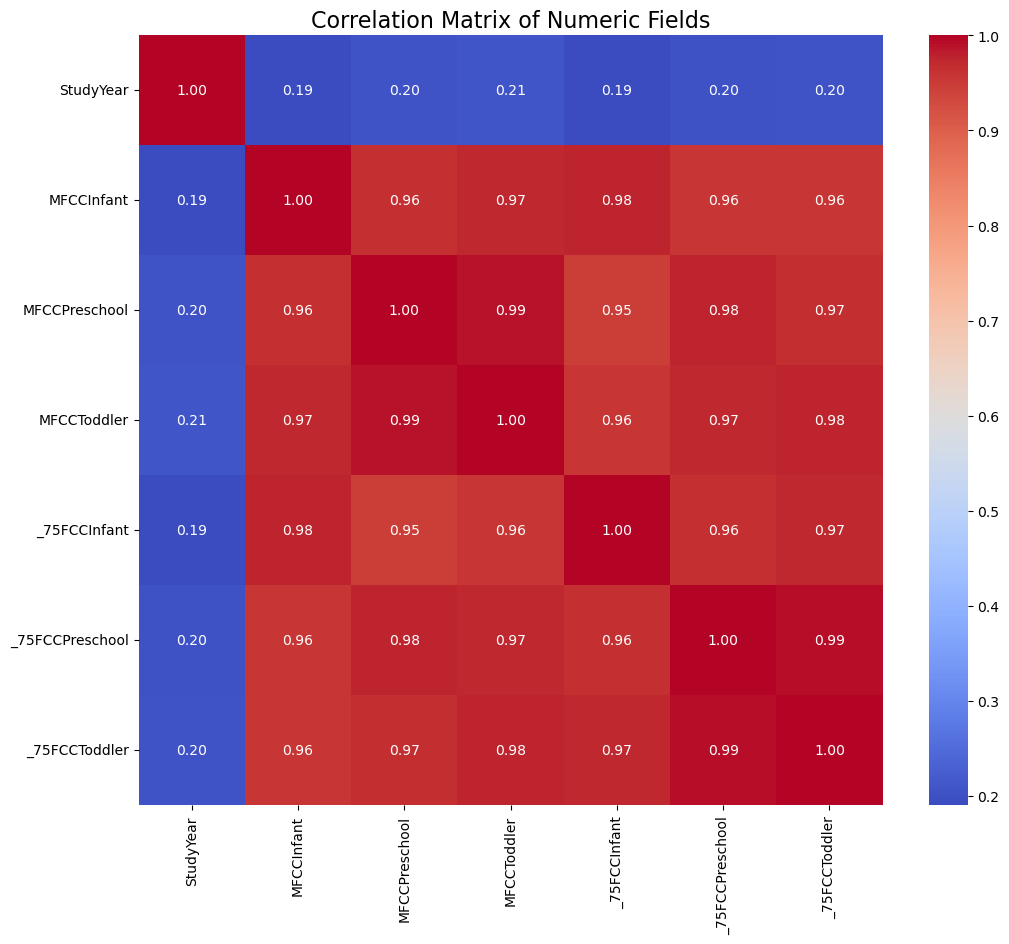

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
# Load the dataset (ensure you've already loaded your full dataset into `full_data`)
# Here, we assume `full_filtered_data` contains the numeric columns from your dataset.

# Select only numeric columns for the correlation analysis
numeric_data = filtered_data.select_dtypes(include=["number"])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numeric Fields", fontsize=16)
plt.show()

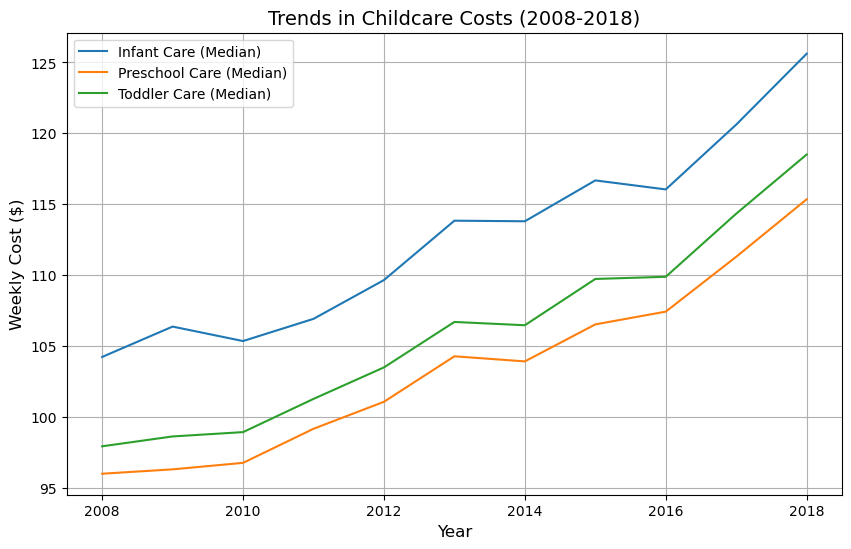

In [22]:
# Identify numeric columns only for analysis
numeric_columns = filtered_data.select_dtypes(include=["number"]).columns

# Performing the grouping and mean operation on numeric columns
grouped_data_numeric = filtered_data.groupby("StudyYear")[numeric_columns].mean()

# Display the grouped data to verify
grouped_data_numeric.head()

# Plotting corrected trends for Infant, Preschool, and Toddler care costs
plt.figure(figsize=(10, 6))
plt.plot(grouped_data_numeric.index, grouped_data_numeric["MFCCInfant"], label="Infant Care (Median)")
plt.plot(grouped_data_numeric.index, grouped_data_numeric["MFCCPreschool"], label="Preschool Care (Median)")
plt.plot(grouped_data_numeric.index, grouped_data_numeric["MFCCToddler"], label="Toddler Care (Median)")

# Add titles and labels
plt.title("Trends in Childcare Costs (2008-2018)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Weekly Cost ($)", fontsize=12)
plt.legend()
plt.grid(True)

# Show the corrected plot
plt.show()



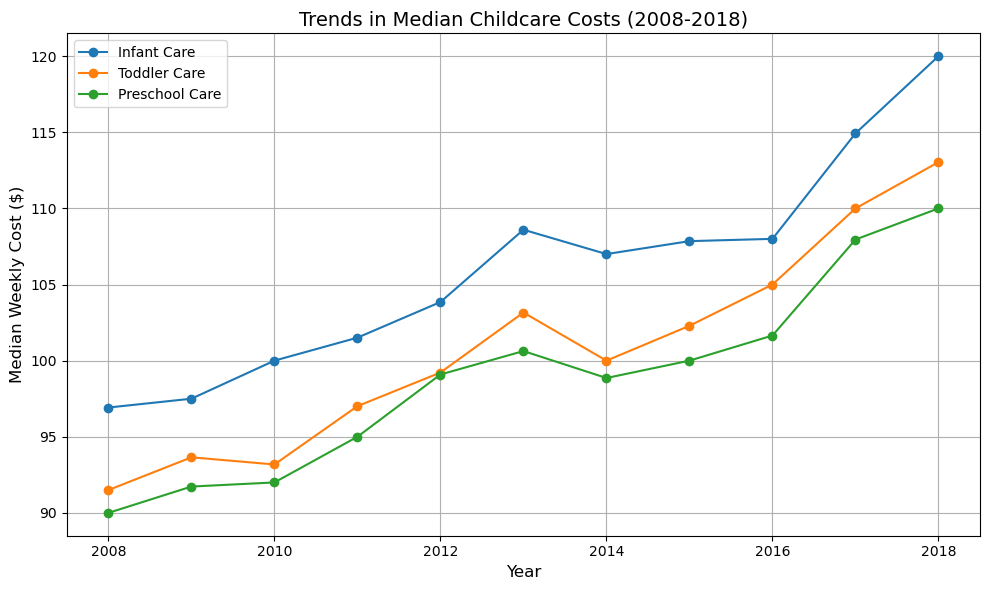

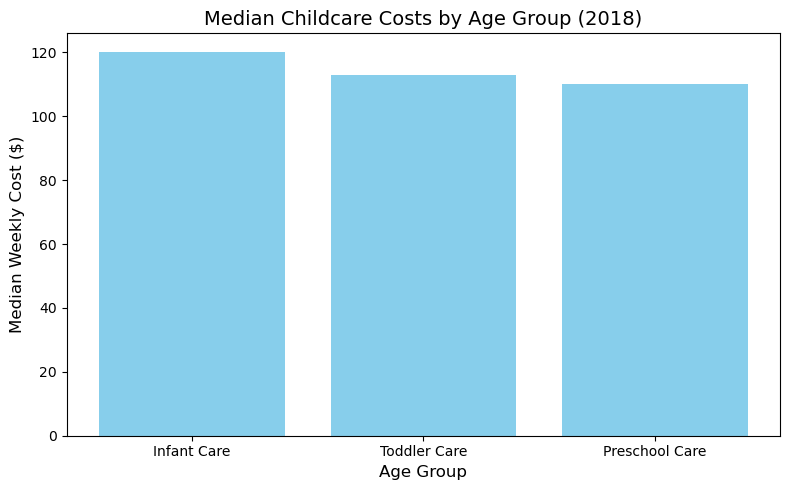

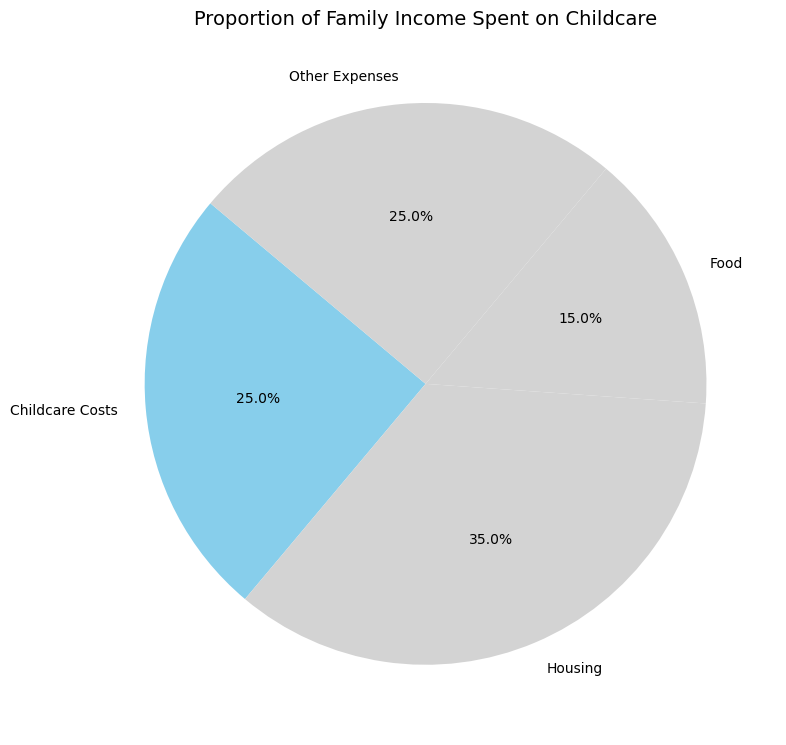

In [24]:
import seaborn as sns

# Ensure data is clean and relevant for the dashboard
dashboard_columns = ["StudyYear", "MFCCInfant", "MFCCToddler", "MFCCPreschool"]
dashboard_data = data[dashboard_columns].dropna()

# Convert StudyYear to integer for grouping
dashboard_data["StudyYear"] = dashboard_data["StudyYear"].astype(int)

# Group data for trends and prepare data for regional comparisons
grouped_dashboard_data = dashboard_data.groupby("StudyYear").median()

# Start creating visuals for the dashboard

# Visual 1: Line Graph (Trends in Childcare Costs)
plt.figure(figsize=(10, 6))
plt.plot(grouped_dashboard_data.index, grouped_dashboard_data["MFCCInfant"], label="Infant Care", marker="o")
plt.plot(grouped_dashboard_data.index, grouped_dashboard_data["MFCCToddler"], label="Toddler Care", marker="o")
plt.plot(grouped_dashboard_data.index, grouped_dashboard_data["MFCCPreschool"], label="Preschool Care", marker="o")
plt.title("Trends in Median Childcare Costs (2008-2018)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Median Weekly Cost ($)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visual 2: Bar Chart (Median Childcare Costs by Age Group in 2018)
costs_2018 = dashboard_data[dashboard_data["StudyYear"] == 2018].median()
categories = ["Infant Care", "Toddler Care", "Preschool Care"]
cost_values = [costs_2018["MFCCInfant"], costs_2018["MFCCToddler"], costs_2018["MFCCPreschool"]]

plt.figure(figsize=(8, 5))
plt.bar(categories, cost_values, color="skyblue")
plt.title("Median Childcare Costs by Age Group (2018)", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Median Weekly Cost ($)", fontsize=12)
plt.tight_layout()
plt.show()

# Visual 3: Pie Chart (Proportion of Family Income on Childcare)
categories = ["Childcare Costs", "Housing", "Food", "Other Expenses"]
proportions = [25, 35, 15, 25]  # Placeholder proportions for visualization
colors = ["skyblue", "lightgrey", "lightgrey", "lightgrey"]
plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=categories, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Proportion of Family Income Spent on Childcare", fontsize=14)
plt.tight_layout()
plt.show()



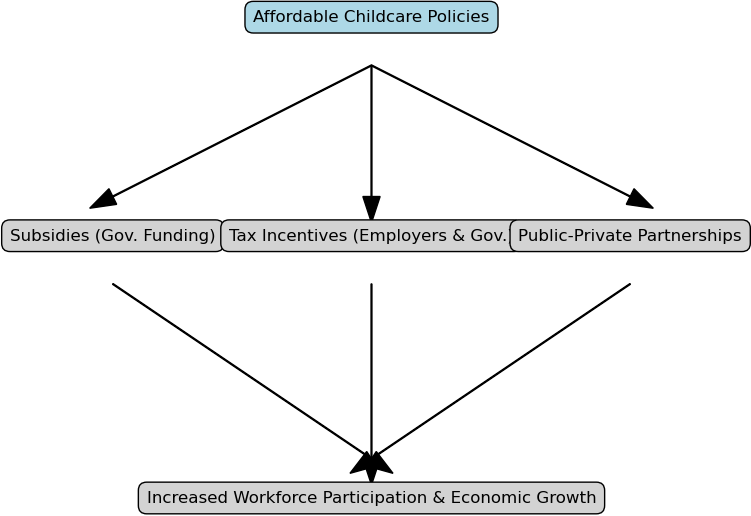

In [34]:
import matplotlib.pyplot as plt

# Adjusted Flowchart with fixed title position
plt.figure(figsize=(8, 6))
plt.axis("off")  # Hide axes

# Define components
components = [
    "Affordable Childcare Policies", 
    "Subsidies (Gov. Funding)", 
    "Tax Incentives (Employers & Gov.)", 
    "Public-Private Partnerships", 
    "Increased Workforce Participation & Economic Growth"
]

# Define positions for flowchart elements
positions = [(0.5, 0.85), (0.2, 0.6), (0.5, 0.6), (0.8, 0.6), (0.5, 0.3)]

# Draw boxes
for i, (text, pos) in enumerate(zip(components, positions)):
    plt.text(pos[0], pos[1], text, fontsize=12, ha="center", bbox=dict(facecolor="lightblue" if i == 0 else "lightgrey", edgecolor="black", boxstyle="round,pad=0.5"))

# Draw arrows connecting components
plt.arrow(0.5, 0.80, -0.3, -0.15, head_width=0.02, head_length=0.03, fc="black", ec="black")
plt.arrow(0.5, 0.80, 0, -0.15, head_width=0.02, head_length=0.03, fc="black", ec="black")
plt.arrow(0.5, 0.80, 0.3, -0.15, head_width=0.02, head_length=0.03, fc="black", ec="black")

plt.arrow(0.2, 0.55, 0.3, -0.2, head_width=0.02, head_length=0.03, fc="black", ec="black")
plt.arrow(0.5, 0.55, 0, -0.2, head_width=0.02, head_length=0.03, fc="black", ec="black")
plt.arrow(0.8, 0.55, -0.3, -0.2, head_width=0.02, head_length=0.03, fc="black", ec="black")



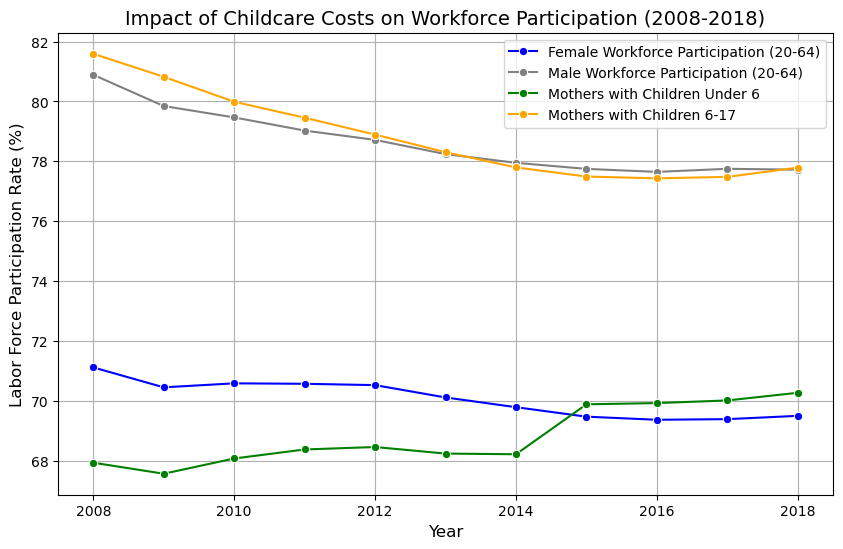

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns for workforce participation impact
workforce_columns = [
    "StudyYear", "FLFPR_20to64", "MLFPR_20to64", "FLFPR_20to64_Under6", "FLFPR_20to64_6to17"
]

# Filter relevant data
workforce_data = data[workforce_columns].groupby("StudyYear").mean().reset_index()

# Create a bar chart comparing labor force participation over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=workforce_data, x="StudyYear", y="FLFPR_20to64", label="Female Workforce Participation (20-64)", marker="o", color="blue")
sns.lineplot(data=workforce_data, x="StudyYear", y="MLFPR_20to64", label="Male Workforce Participation (20-64)", marker="o", color="gray")
sns.lineplot(data=workforce_data, x="StudyYear", y="FLFPR_20to64_Under6", label="Mothers with Children Under 6", marker="o", color="green")
sns.lineplot(data=workforce_data, x="StudyYear", y="FLFPR_20to64_6to17", label="Mothers with Children 6-17", marker="o", color="orange")

# Formatting
plt.title("Impact of Childcare Costs on Workforce Participation (2008-2018)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Labor Force Participation Rate (%)", fontsize=12)
plt.legend()
plt.grid(True)

plt.show()
